*Mantas Valiulis \
Lab. darbas Nr. 1, II dalis*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Pagrindinė dalis

**Naudojamas I-oje dalyje išsaugotas csv failas su apdorotu 'esoph' duomenų rinkiniu.**

In [2]:
df = pd.read_csv('esoph_df.csv')
df

,agegp,alcgp,tobgp,ncases,ncontrols,cases_ratio
0,30,20,5,0,40,0.0
1,30,20,15,0,10,0.0
2,30,20,25,0,6,0.0
3,30,20,30,0,5,0.0
4,30,60,5,0,27,0.0
...,...,...,...,...,...,...
83,80,60,30,1,1,50.0
84,80,100,5,1,1,50.0
85,80,100,15,1,1,50.0
86,80,120,5,2,2,50.0


**Paskaičiuojama koreliacijos matrica atmetus 'ncontrols' ir 'ncases' stulpelius**

In [3]:
corr_matrix = df.loc[:,~df.columns.isin(['ncontrols','ncases'])].corr()
corr_matrix

,agegp,alcgp,tobgp,cases_ratio
agegp,1.000000,-0.013670,-0.068779,0.587032
alcgp,-0.013670,1.000000,-0.045684,0.506651
tobgp,-0.068779,-0.045684,1.000000,0.050709
cases_ratio,0.587032,0.506651,0.050709,1.000000


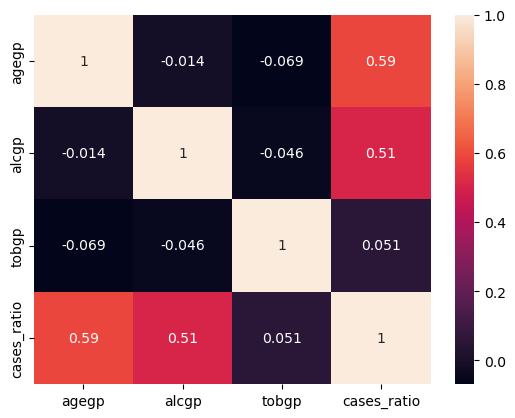

In [12]:
sns.heatmap(corr_matrix, annot=True);

**Toliau naudojamas 'esoph' duomenų rinkinys su nepakeistomis kategorijų reikšmėmis. Pavaizduojamos stulepilinės diagramos.**

In [5]:
df2 = pd.read_csv('esoph_df2.csv')
df2

,agegp,alcgp,tobgp,ncases,ncontrols,cases_ratio
0,25-34,0-39g/day,0-9g/day,0,40,0.0
1,25-34,0-39g/day,10-19,0,10,0.0
2,25-34,0-39g/day,20-29,0,6,0.0
3,25-34,0-39g/day,30+,0,5,0.0
4,25-34,40-79,0-9g/day,0,27,0.0
...,...,...,...,...,...,...
83,75+,40-79,30+,1,1,50.0
84,75+,80-119,0-9g/day,1,1,50.0
85,75+,80-119,10-19,1,1,50.0
86,75+,120+,0-9g/day,2,2,50.0


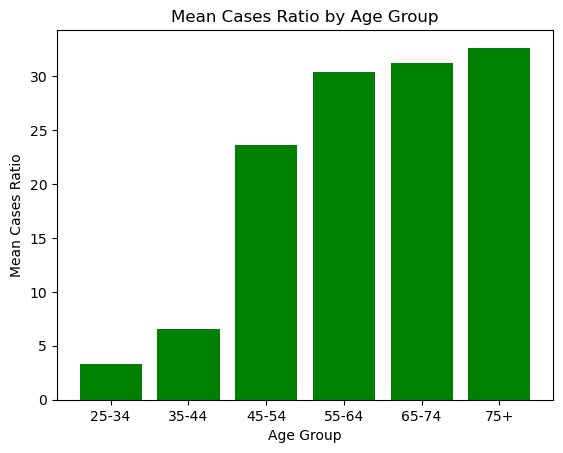

In [6]:
mean_cases_ratio_by_agegp = df2.groupby('agegp')['cases_ratio'].mean().reset_index()

plt.bar(mean_cases_ratio_by_agegp['agegp'], mean_cases_ratio_by_agegp['cases_ratio'],color = "green")

plt.title("Mean Cases Ratio by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mean Cases Ratio")

plt.show()

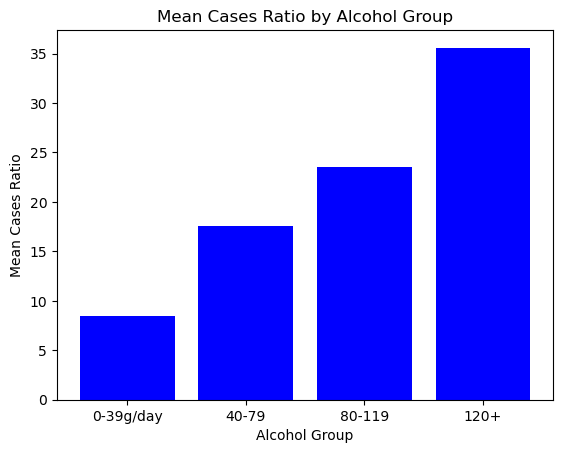

In [7]:
mean_cases_ratio_by_alcgp = df2.groupby('alcgp')['cases_ratio'].mean().reset_index().sort_values(by = 'cases_ratio')

plt.bar(mean_cases_ratio_by_alcgp['alcgp'], mean_cases_ratio_by_alcgp['cases_ratio'],color = "blue")

plt.title("Mean Cases Ratio by Alcohol Group")
plt.xlabel("Alcohol Group")
plt.ylabel("Mean Cases Ratio")

plt.show()

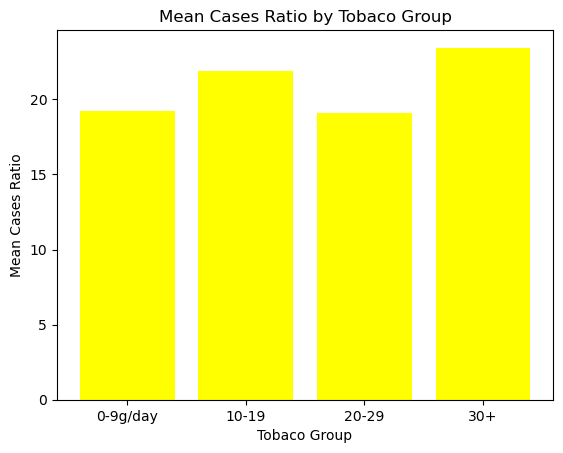

In [8]:
mean_cases_ratio_by_tobgp = df2.groupby('tobgp')['cases_ratio'].mean().reset_index()

plt.bar(mean_cases_ratio_by_tobgp['tobgp'], mean_cases_ratio_by_tobgp['cases_ratio'],color = "yellow")

plt.title("Mean Cases Ratio by Tobaco Group")
plt.xlabel("Tobaco Group")
plt.ylabel("Mean Cases Ratio")

plt.show()

# Papildoma dalis

**Remiantis amžiaus, alkoholio ir tobako grupėmis, apmokomas tiesinės regresijos modelis paskaičiuoti vėžio susirgimų santykį.**

In [9]:
X = df[['agegp', 'alcgp','tobgp']]
y = df['cases_ratio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train);


**Įvertinamas modelio tikslumas**

In [10]:
y_pred = model.predict(X_test)
print(f'R^2 score: {r2_score(y_test, y_pred)}')

coefficients = model.coef_
column_names = X.columns
for col_name, coef in zip(column_names, coefficients):
    print(f'Coefficient for {col_name}: {coef}')

R^2 score: 0.6310980503621302
Coefficient for agegp: 0.6550317157754454
Coefficient for alcgp: 0.258778833005511
Coefficient for tobgp: 0.21166518388434433


**Pavyzdinis spėjimas, remiantis duotais duomenimis**

In [11]:
new_data = pd.DataFrame({'agegp': [80,30,20],
                         'alcgp': [50,120,90],
                         'tobgp': [20,30,40]})
predicted_cases_ratio = model.predict(new_data)
print(predicted_cases_ratio)

[32.662044   20.14162836  7.94459805]
